(-0.5, 220.5, 220.5, -0.5)

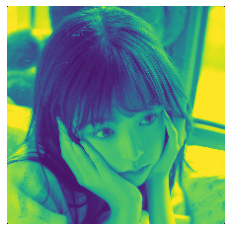

In [192]:
from PIL import Image
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F

path = '/Users/hzh/Downloads/x.png'
img = Image.open(path).convert('L')
img = transforms.ToTensor()(img)
img = transforms.Resize((221,221))(img).float()
# 原图
plt.imshow(img[0,:,:])
plt.axis('off')
                        

## 频域乘积

(-0.5, 220.5, 220.5, -0.5)

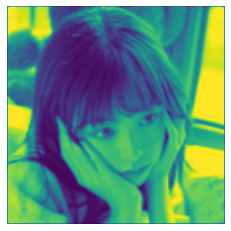

In [193]:
Filter = torch.tensor([[2,1 ,2],
                        [2 ,1,2],
                        [2 ,1 ,2]
                        ]).unsqueeze(0).unsqueeze(0).float()
                        
filter_padding = F.pad(Filter,(110,110,110,110)).squeeze(0).squeeze(0)
filter_k = torch.fft.fftshift(torch.fft.fft2(filter_padding))


img_p = F.pad(img.unsqueeze(0),(1,1,1,1))
img_k = torch.fft.fftshift(torch.fft.fft2(img_p)).squeeze(0).squeeze(0)



img_k_mul = filter_k *img_k
img_out = torch.fft.ifftshift(torch.fft.ifft2(img_k_mul))[1:222,1:222].abs()


plt.imshow(img_out)
plt.axis('off')


## 空域卷积

(-0.5, 220.5, 220.5, -0.5)

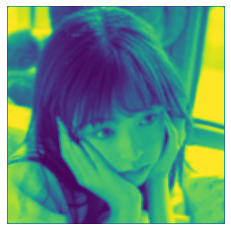

In [194]:
img_conv= F.conv2d(img_p.float(),Filter,padding = 0).squeeze(0).squeeze(0)

plt.imshow(img_conv.abs())
plt.axis('off')

In [195]:
differnet =  img_conv- img_out

In [196]:
differnet.max()

tensor(6.6757e-06)

In [197]:
differnet.min()

tensor(-1.1444e-05)

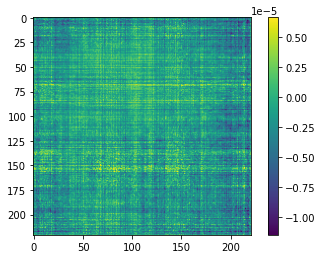

In [201]:
plt.imshow(differnet)
plt.colorbar()

In [199]:
a = torch.fft.fftshift(torch.arange(1,10,1))
print(a)
b = torch.fft.fftshift(a)
print(b)
c = torch.fft.fftshift(torch.arange(1,11,1))
print(c)
d = torch.fft.fftshift(c)
print(d)

tensor([6, 7, 8, 9, 1, 2, 3, 4, 5])
tensor([2, 3, 4, 5, 6, 7, 8, 9, 1])
tensor([ 6,  7,  8,  9, 10,  1,  2,  3,  4,  5])
tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])


In [200]:
a = torch.fft.fftshift(torch.arange(1,10,1))
print(a)
b = torch.fft.ifftshift(a)
print(b)
c = torch.fft.fftshift(torch.arange(1,11,1))
print(c)
d = torch.fft.ifftshift(c)
print(d)

tensor([6, 7, 8, 9, 1, 2, 3, 4, 5])
tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([ 6,  7,  8,  9, 10,  1,  2,  3,  4,  5])
tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
